# Katz centrality

In [14]:
#import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer
import math
import scipy.stats as stats
import pandas as pd
import sklearn
from sklearn import preprocessing

## Algorithm

In [15]:
def katz(G, max_num_of_steps, tolerance, alpha, beta, vector=None):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    diff = 1000
    k = 0
    ones = np.ones((A.shape[1], 1))
    if vector is None:
        vector = ones
    r = beta * vector
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * ones, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    r = r/np.linalg.norm(r,ord = 2)
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return r

### Small example

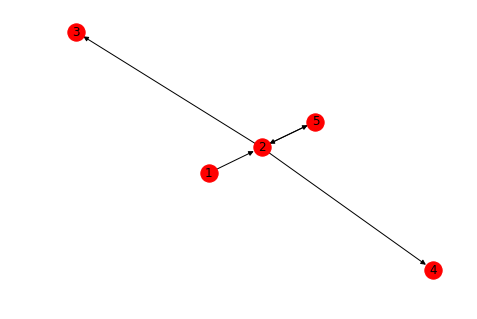

[[0 1 0 0 0]
 [0 0 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]]


In [16]:
T = nx.DiGraph()   # or DiGraph, etc
T.add_edges_from(((1, 2), (2, 3), (2, 4), (2, 5), (5, 2)))
nx.draw(T, with_labels=True)
plt.show()
print(nx.adjacency_matrix(T).todense())

In [17]:
#največja lastna vrednost
l = np.amax(np.linalg.eigvals(nx.adjacency_matrix(T).todense()))
l

1.0

Torej mora biti alpha < 1.

In [18]:
test = katz(T, 10000, 0.001, 0.1,1)
test

process finished after 4 iterations
time consumption: 0.0012862570000038431 seconds


array([[0.45129734],
       [0.52382086],
       [0.39891924],
       [0.39891924],
       [0.45129734]])

In [19]:
test1 = katz(T, 10000, 0.001, 0.1,80)
test1

process finished after 6 iterations
time consumption: 0.0014330299999869567 seconds


array([[0.45129749],
       [0.52382738],
       [0.39891479],
       [0.39891479],
       [0.45129749]])

In [20]:
def rank(array):
    '''Returns vector with ranked values of array,
    where 0 is the minimum value of array'''
    temp = array.argsort(axis=0)
    ranks = temp.argsort(axis=0)
    return ranks

In [21]:
rank(test) == rank(test1)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Katz centrality on networks

In [22]:
#citation:@misc{snapnets,
#  author       = {Jure Leskovec and Andrej Krevl},
#  title        = {{SNAP Datasets}: {Stanford} Large Network Dataset Collection},
#  howpublished = {\url{http://snap.stanford.edu/data}},
#  month        = jun,
#  year         = 2014
#}
G_fb = nx.read_edgelist('facebook_combined.txt')

In [23]:
M_fb = nx.adjacency_matrix(G_fb)

In [24]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [ ]:
spring_pos = nx.spring_layout(G_fb)
nx.draw(G_fb, pos = spring_pos, node_size = 35)
plt.show()

### BETA PARAMETER

Poglejmo, če izbira beta parametra vpliva na algoritem. Izberimo fiksen alpha = 0.003. Spodaj bomo videli,da je to dobra izbira.

In [49]:
b1 = katz(G_fb, 10000000, 0.01, 0.003, 1)
b1

process finished after 15 iterations
time consumption: 0.424404074999984 seconds


array([[0.02708885],
       [0.01358665],
       [0.01327441],
       ...,
       [0.01291167],
       [0.01299226],
       [0.01318997]])

In [38]:
b2 = katz(G_fb, 10000000, 0.01, 0.003, 10)
b2

process finished after 18 iterations
time consumption: 0.43706014199995025 seconds


array([[0.02708881],
       [0.01358663],
       [0.01327439],
       ...,
       [0.01291166],
       [0.01299224],
       [0.01318995]])

In [30]:
rank(b1) == rank(b2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

Vidimo, da dobimo skoraj iste vrednosti, le število iteracij se poveča.

In [41]:
#graph of time of katz algorithm depending on beta

def katz2(G, max_num_of_steps, tolerance, alpha, beta):
    '''Computes the Katz centrality for the nodes of the graph G.'''
    start = timer()
    A = nx.adjacency_matrix(G)
    # first guess for vector r is first column of A
    r = A[:, 0]  
    diff = 1000
    k = 0
    vector = np.ones((A.shape[1], 1))
    while diff > tolerance and k < max_num_of_steps:
        # inner product of matrix A and vector r
        r, q = alpha*A.dot(r) + beta * vector, r
        diff = np.linalg.norm(q-r, ord=1)
        k += 1
    #normalized_r = preprocessing.normalize(r, axis=0, norm ='l1')
    print('process finished after {} iterations'.format(k))
    end = timer()
    # timing of the process
    print('time consumption: {} seconds'.format(end-start))
    return (end-start, k)

timings_beta = {}
for beta in range (0,1000,10):
    timings_beta[beta] = katz2(G_fb, 100000, 0.01, 0.003,beta)

process finished after 7 iterations
time consumption: 0.4360076980001395 seconds
process finished after 19 iterations
time consumption: 0.40359753899997486 seconds
process finished after 20 iterations
time consumption: 0.4402863109999089 seconds
process finished after 20 iterations
time consumption: 0.4442878730001212 seconds
process finished after 21 iterations
time consumption: 0.4453966380001475 seconds
process finished after 21 iterations
time consumption: 0.40930292400003054 seconds
process finished after 21 iterations
time consumption: 0.46003983300010987 seconds
process finished after 21 iterations
time consumption: 0.44740538399992147 seconds
process finished after 22 iterations
time consumption: 0.43332766300000003 seconds
process finished after 22 iterations
time consumption: 0.4019375210000362 seconds
process finished after 22 iterations
time consumption: 0.44200549200013484 seconds
process finished after 22 iterations
time consumption: 0.4558550879999075 seconds
process fin

In [42]:
iterations_beta = [i[1] for i in timings_beta.values()]
iterations_beta

[7,
 19,
 20,
 20,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25]

In [43]:
timings_beta

{0: (0.4360076980001395, 7),
 10: (0.40359753899997486, 19),
 20: (0.4402863109999089, 20),
 30: (0.4442878730001212, 20),
 40: (0.4453966380001475, 21),
 50: (0.40930292400003054, 21),
 60: (0.46003983300010987, 21),
 70: (0.44740538399992147, 21),
 80: (0.43332766300000003, 22),
 90: (0.4019375210000362, 22),
 100: (0.44200549200013484, 22),
 110: (0.4558550879999075, 22),
 120: (0.46716459599997506, 22),
 130: (0.4486859520000053, 22),
 140: (0.45702472399989347, 22),
 150: (0.397686216000011, 23),
 160: (0.46849864000000707, 23),
 170: (0.4517391780000253, 23),
 180: (0.47097842599987416, 23),
 190: (0.4155311179999899, 23),
 200: (0.48608981700022014, 23),
 210: (0.4755795979999675, 23),
 220: (0.4370572979998997, 23),
 230: (0.4016627480000352, 23),
 240: (0.4636909610001112, 23),
 250: (0.44599397100000715, 23),
 260: (0.3996693619999405, 23),
 270: (0.4575264839997999, 23),
 280: (0.4863873459999013, 23),
 290: (0.44478337600003215, 23),
 300: (0.47468928700004653, 23),
 310: (

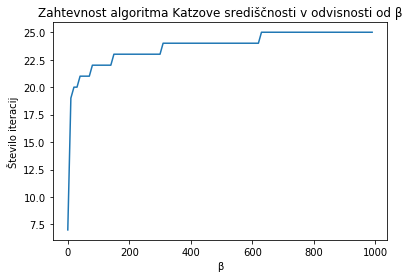

In [44]:
plt.plot(timings_beta.keys(), iterations_beta)
plt.xlabel('β')
plt.ylabel('Število iteracij')
plt.title('Zahtevnost algoritma Katzove središčnosti v odvisnosti od β')
plt.savefig('Katz_beta.png')
plt.show()

### ALPHA PARAMETER

In [25]:
#max lastna vrednost
np.amax(np.linalg.eigvals(M_fb.todense()))

(162.37394233563828+0j)

In [26]:
1/162.37394233563828

0.006158623641304035

Vzamem alpha < 0.0061586.

In [27]:
r1 = katz(G_fb, 10000000, 0.01, 0.0062, 1)
rank(r1)

process finished after 104436 iterations
time consumption: 213.18206373500004 seconds


c:\users\tina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


array([[   0],
       [2683],
       [2684],
       ...,
       [1352],
       [2018],
       [4038]], dtype=int64)

Vidimo, če pri izbiri alpha ne upoštevamo zgornje omejitve, se pojavi napaka.

In [53]:
r2 = katz(G_fb, 100000, 0.01, 0.0061, 1)
rank(r2)

process finished after 1056 iterations
time consumption: 1.1106130180000946 seconds


array([[3404],
       [1125],
       [ 577],
       ...,
       [  17],
       [  91],
       [ 361]], dtype=int64)

In [54]:
r3 = katz(G_fb, 10000000, 0.01, 0.003, 1)
rank(r3)

process finished after 15 iterations
time consumption: 0.2149773610003649 seconds


array([[3977],
       [1403],
       [ 807],
       ...,
       [  43],
       [ 175],
       [ 598]], dtype=int64)

In [47]:
r4 = katz(G_fb, 100000, 0.01, 0.001, 1)
rank(r4)

process finished after 6 iterations
time consumption: 0.41557662800005346 seconds


array([[4034],
       [1488],
       [ 877],
       ...,
       [  68],
       [ 258],
       [ 750]], dtype=int64)

In [48]:
#graph of time of katz algorithm depending on alpha

timings_alpha = {}
for alpha in range (0, 613, 10):
    timings_alpha[alpha/100000] = katz2(G_fb, 100000, 0.0000001, alpha/100000, 1)

process finished after 2 iterations
time consumption: 0.36551897200001804 seconds
process finished after 7 iterations
time consumption: 0.3933347859999685 seconds
process finished after 8 iterations
time consumption: 0.4109310829999231 seconds
process finished after 9 iterations
time consumption: 0.36543932699987636 seconds
process finished after 9 iterations
time consumption: 0.45344641399992724 seconds
process finished after 10 iterations
time consumption: 0.44465025499994226 seconds
process finished after 11 iterations
time consumption: 0.402776632000041 seconds
process finished after 11 iterations
time consumption: 0.45356815599984657 seconds
process finished after 12 iterations
time consumption: 0.4391673059999448 seconds
process finished after 13 iterations
time consumption: 0.4630247929999314 seconds
process finished after 13 iterations
time consumption: 0.40359810800009654 seconds
process finished after 14 iterations
time consumption: 0.4701757240000006 seconds
process finished

In [50]:
iterations_alpha = [i[1] for i in timings_alpha.values()]
iterations_alpha

[2,
 7,
 8,
 9,
 9,
 10,
 11,
 11,
 12,
 13,
 13,
 14,
 15,
 15,
 16,
 17,
 18,
 18,
 19,
 20,
 21,
 22,
 23,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 40,
 42,
 44,
 46,
 49,
 52,
 55,
 58,
 62,
 66,
 70,
 76,
 81,
 88,
 96,
 105,
 116,
 129,
 145,
 166,
 193,
 229,
 281,
 362,
 505,
 830,
 2261]

In [51]:
timings_alpha

{0.0: (0.36551897200001804, 2),
 0.0001: (0.3933347859999685, 7),
 0.0002: (0.4109310829999231, 8),
 0.0003: (0.36543932699987636, 9),
 0.0004: (0.45344641399992724, 9),
 0.0005: (0.44465025499994226, 10),
 0.0006: (0.402776632000041, 11),
 0.0007: (0.45356815599984657, 11),
 0.0008: (0.4391673059999448, 12),
 0.0009: (0.4630247929999314, 13),
 0.001: (0.40359810800009654, 13),
 0.0011: (0.4701757240000006, 14),
 0.0012: (0.5045604969998294, 15),
 0.0013: (0.46756680000021333, 15),
 0.0014: (0.39817545999994763, 16),
 0.0015: (0.4267922690000887, 17),
 0.0016: (0.4507038010001452, 18),
 0.0017: (0.40828006100014136, 18),
 0.0018: (0.43690654300007736, 19),
 0.0019: (0.47644544600007066, 20),
 0.002: (0.39261684799998875, 21),
 0.0021: (0.43459400999995523, 22),
 0.0022: (0.44639674500012916, 23),
 0.0023: (0.39082883099990795, 23),
 0.0024: (0.4553629990000445, 24),
 0.0025: (0.4497201919998588, 25),
 0.0026: (0.4478536690000965, 27),
 0.0027: (0.4493669119999595, 28),
 0.0028: (0.4768

Pri alpha = 0.0062 ponori.

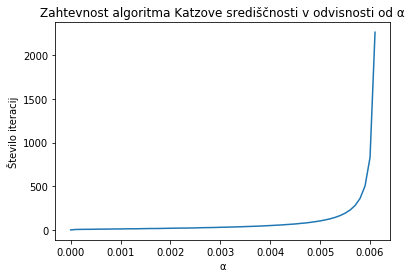

In [52]:
plt.plot(timings_alpha.keys(), iterations_alpha)
plt.xlabel('α')
plt.ylabel('Število iteracij')
plt.title('Zahtevnost algoritma Katzove središčnosti v odvisnosti od α')
plt.savefig('Katz_alpha.png')
plt.show()

In [80]:
r5 = katz(G_fb, 100000, 0.01, 0.003, 1)
rank(r5)

process finished after 15 iterations
time consumption: 0.4475003890001972 seconds


array([[2796],
       [1633],
       [1170],
       ...,
       [ 215],
       [ 230],
       [ 258]], dtype=int64)

In [81]:
r5 = katz(G_fb, 100000, 0.01, 0.003, 2)
rank(r5)

process finished after 16 iterations
time consumption: 0.4280785280006967 seconds


array([[2852],
       [1773],
       [1291],
       ...,
       [ 215],
       [ 230],
       [ 258]], dtype=int64)

In [83]:
r5 = katz(G_fb, 100000, 0.01, 0.003, 10000)
rank(r5)

process finished after 27 iterations
time consumption: 0.45016620099977445 seconds


array([[2994],
       [1971],
       [1777],
       ...,
       [ 217],
       [ 232],
       [ 541]], dtype=int64)